In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

## Manually convert the mzML file to an mzMLb file using the Proteowizard GUI
It doesn't seem like msconvert supports mzMLb conversion via command line (yet)

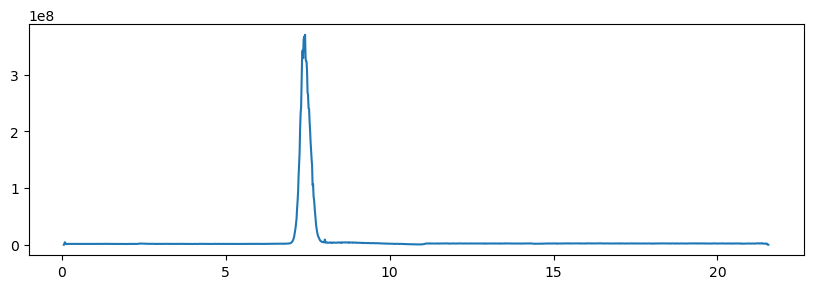

In [2]:
chrom_data = get_chrom_mzmlb('../demo_data/180205_Poo_TruePoo_Full1.mzMLb', 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

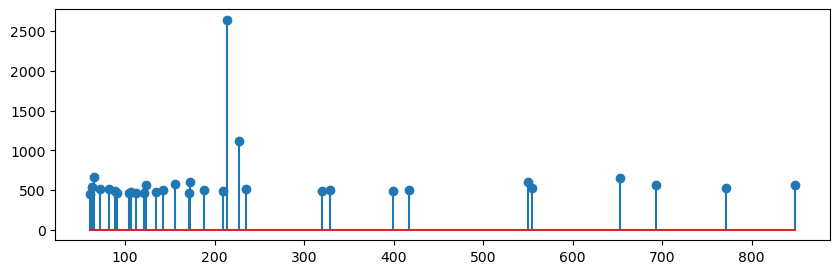

In [3]:
spec_data = get_spec_mzmlb("../demo_data/180205_Poo_TruePoo_Full1.mzMLb", 1)
plt.stem(spec_data["mz"], spec_data["int"])

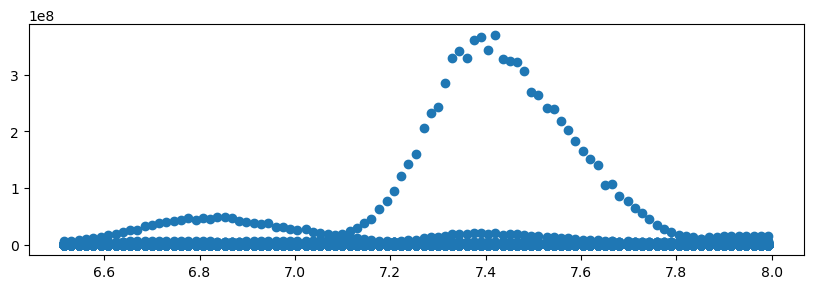

In [4]:
rtrange_data = get_rtrange_mzmlb('../demo_data/180205_Poo_TruePoo_Full1.mzMLb', 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

## Timing comparison to regular and indexed mzML

In [5]:
import timeit
mzml_spec = timeit.repeat('get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
mzmlb_spec = timeit.repeat('get_spec_mzmlb("../demo_data/180205_Poo_TruePoo_Full1.mzMLb", 1)', globals=globals(), number=1, repeat=10)

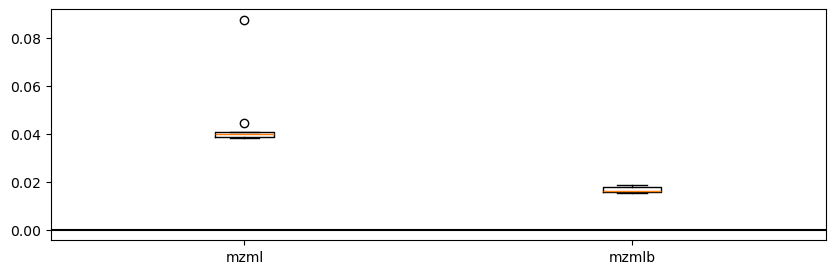

In [6]:
plt.boxplot([mzml_spec, mzmlb_spec], tick_labels=["mzml", "mzmlb"])
plt.axhline(y=0, color="k")
plt.show()

## Chromatogram extraction

In [7]:
mzml_chrom = timeit.repeat('get_chrom_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
mzmlb_chrom = timeit.repeat('get_chrom_mzmlb("../demo_data/180205_Poo_TruePoo_Full1.mzMLb", 118.0865, 10)', globals=globals(), number=1, repeat=10)

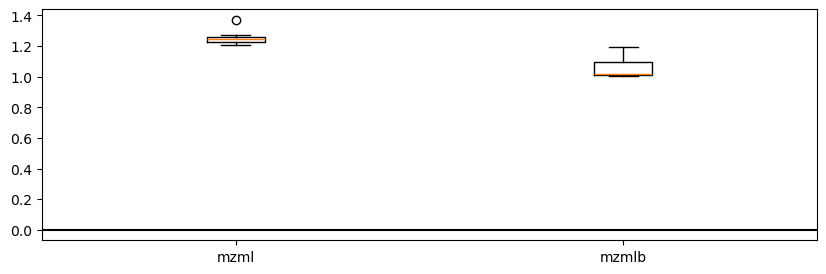

In [8]:
plt.boxplot([mzml_chrom, mzmlb_chrom], tick_labels=["mzml", "mzmlb"])
plt.axhline(y=0, color="k")
plt.show()

In [10]:
import pandas as pd
rtrange_df = pd.DataFrame({
    "method": ["pyteomics"]*10 + ["mzmlb"]*10,
    "time": mzml_chrom + mzmlb_chrom
})
rtrange_df["metric"] = "rtrange"
spec_df = pd.DataFrame({
    "method": ["pyteomics"]*10 + ["mzmlb"]*10,
    "time": mzml_spec + mzmlb_spec
})
spec_df["metric"] = "spec"
chrom_df = pd.DataFrame({
    "method": ["pyteomics"]*10 + ["mzmlb"]*10,
    "time": mzml_chrom + mzmlb_chrom
})
chrom_df["metric"] = "chrom"

complete_timings = pd.concat([spec_df, chrom_df, rtrange_df], ignore_index=True)
complete_timings["datetime"] = pd.to_datetime('now')
complete_timings.to_csv("compiled_timings.csv", mode='a', index=False, header=False)